<a href="https://colab.research.google.com/github/yli1048/yli1048/blob/602/08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I selected a dataset titled "New York City Leading Causes of Death" from NYC OpenData. This dataset includes information on the leading causes of death categorized by sex and ethnicity in New York City since 2007. The cause of death is derived from the NYC death certificate, which is issued for every death that occurs in the city. The dataset is updated annually by the Department of Health and Mental Hygiene (DOHMH).

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [23]:
import pandas as pd

#import data and add column names since there were no column names
df = pd.read_csv("https://raw.githubusercontent.com/yli1048/yli1048/refs/heads/602/New_York_City_Leading_Causes_of_Death_20241113.csv", names = ["year", "leading_cause", "sex", "race_ethnicity", "deaths", "death_rate", "adjusted_death_rate"], header = 0)

#check dataframe
print(df.head(3))

   year                                      leading_cause sex  \
0  2011  Nephritis, Nephrotic Syndrome and Nephrisis (N...   F   
1  2009  Human Immunodeficiency Virus Disease (HIV: B20...   F   
2  2009       Chronic Lower Respiratory Diseases (J40-J47)   F   

       race_ethnicity deaths death_rate adjusted_death_rate  
0  Black Non-Hispanic     83        7.9                 6.9  
1            Hispanic     96          8                 8.1  
2            Hispanic    155       12.9                  16  


In [24]:
#find dimension
df.shape

(2102, 7)

In [25]:
#check for na values
na = df.isnull().sum()
print(na)

year                     0
leading_cause            0
sex                      0
race_ethnicity           0
deaths                   0
death_rate             343
adjusted_death_rate    343
dtype: int64


In [26]:
#remove rows with na values
df = df.dropna()

In [27]:
#remove all "." values in the dataframe
value = ["."]
df = df[df.deaths.isin(value) == False]
df = df[df.death_rate.isin(value) == False]
df = df[df.adjusted_death_rate.isin(value) == False]

In [28]:
#find dimension
df.shape

(1373, 7)

In [29]:
#check column type
print(df.dtypes)

year                    int64
leading_cause          object
sex                    object
race_ethnicity         object
deaths                 object
death_rate             object
adjusted_death_rate    object
dtype: object


In [30]:
#change column type for summary statistics
convert_dict = {"year": str,
         "deaths": float,
         "death_rate": float,
         "adjusted_death_rate": float}

df = df.astype(convert_dict)
print(df.dtypes)

year                    object
leading_cause           object
sex                     object
race_ethnicity          object
deaths                 float64
death_rate             float64
adjusted_death_rate    float64
dtype: object


In [31]:
#Find the quartiles for all numeric columns in dataframe
print(df.quantile(q=[0, 0.25, 0.5, 0.75, 1], axis=0, numeric_only=True))

      deaths  death_rate  adjusted_death_rate
0.00     5.0       2.400             2.500000
0.25   110.0      12.843            12.338107
0.50   220.0      20.100            19.800000
0.75   529.0      78.900            81.500000
1.00  7050.0     491.400           414.594473


In [32]:
#find sum of deaths by year, cause, and race ethnicity.
sum_df = df.groupby(["year", "leading_cause", "race_ethnicity"])["deaths"].agg("sum")
print(sum_df.head(3))

year  leading_cause                                                     race_ethnicity            
2007  Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)  Asian and Pacific Islander     85.0
                                                                        Black Non-Hispanic            245.0
                                                                        Hispanic                      225.0
Name: deaths, dtype: float64


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [33]:
#create a subset for all the leading causes of death in 2021
df_2021 = df[df["year"] == "2021"].copy()
print(df_2021.head(3))

      year                                   leading_cause   sex  \
1963  2021  Diseases of Heart (I00-I09, I11, I13, I20-I51)  Male   
1964  2021                                        Covid-19  Male   
1965  2021           Malignant Neoplasms (Cancer: C00-C97)  Male   

     race_ethnicity  deaths  death_rate  adjusted_death_rate  
1963       Hispanic  1565.0       131.0                156.8  
1964       Hispanic  1236.0       103.4                119.4  
1965       Hispanic  1123.0        94.0                110.1  


In [34]:
#create subset by gender for all the leading causes of death in 2021
male_2021 = df_2021[df_2021["sex"] == "Male"].copy()
print(male_2021.head(3))

      year                                   leading_cause   sex  \
1963  2021  Diseases of Heart (I00-I09, I11, I13, I20-I51)  Male   
1964  2021                                        Covid-19  Male   
1965  2021           Malignant Neoplasms (Cancer: C00-C97)  Male   

     race_ethnicity  deaths  death_rate  adjusted_death_rate  
1963       Hispanic  1565.0       131.0                156.8  
1964       Hispanic  1236.0       103.4                119.4  
1965       Hispanic  1123.0        94.0                110.1  


In [35]:
#create subset by gender for all the leading causes of death in 2021
female_2021 = df_2021[df_2021["sex"] == "Female"].copy()
print(female_2021.head(3))

      year                                   leading_cause     sex  \
1988  2021         Influenza (Flu) and Pneumonia (J09-J18)  Female   
2034  2021  Diseases of Heart (I00-I09, I11, I13, I20-I51)  Female   
2035  2021           Malignant Neoplasms (Cancer: C00-C97)  Female   

     race_ethnicity  deaths  death_rate  adjusted_death_rate  
1988       Hispanic   169.0        13.3                 11.6  
2034       Hispanic  1409.0       111.0                 95.5  
2035       Hispanic  1157.0        91.2                 80.8  


In [36]:
#create a subset for all diseases of heart
heart_df = df[df["leading_cause"] == "Diseases of Heart (I00-I09, I11, I13, I20-I51)"].copy()
print(heart_df.head(3))

    year                                   leading_cause sex  \
3   2008  Diseases of Heart (I00-I09, I11, I13, I20-I51)   F   
36  2008  Diseases of Heart (I00-I09, I11, I13, I20-I51)   M   
60  2011  Diseases of Heart (I00-I09, I11, I13, I20-I51)   M   

                race_ethnicity  deaths  death_rate  adjusted_death_rate  
3                     Hispanic  1445.0       122.3                160.7  
36          Black Non-Hispanic  2077.0       244.6                330.2  
60  Asian and Pacific Islander   452.0        85.5                117.8  


In [37]:
#find the sum of deaths by year and sex
heart_gender = heart_df.groupby(["year", "leading_cause", "sex"])["deaths"].agg("sum")

#convert to datasframe and rename the columns
heart_gender = heart_gender.reset_index()
heart_gender.columns = ["year", "leading_cause", "sex", "deaths"]
print(heart_gender.head(3))

   year                                   leading_cause sex   deaths
0  2007  Diseases of Heart (I00-I09, I11, I13, I20-I51)   F  11618.0
1  2007  Diseases of Heart (I00-I09, I11, I13, I20-I51)   M   9576.0
2  2008  Diseases of Heart (I00-I09, I11, I13, I20-I51)   F  11462.0


In [38]:
#convert F to Female and M to Male so we can get the same format for sex
gender_df = heart_gender.replace({"sex":{"F": "Female", "M": "Male"}})
print(gender_df.head(3))

   year                                   leading_cause     sex   deaths
0  2007  Diseases of Heart (I00-I09, I11, I13, I20-I51)  Female  11618.0
1  2007  Diseases of Heart (I00-I09, I11, I13, I20-I51)    Male   9576.0
2  2008  Diseases of Heart (I00-I09, I11, I13, I20-I51)  Female  11462.0


In [39]:
import pandas as pd

#pivot the dataframe into two columns for Female and Male
final_gender = pd.pivot(gender_df, index = "year", columns = "sex", values = "deaths")

#rename the columns
final_gender = final_gender.reset_index()
final_gender.columns = ["year", "Female", "Male"]
print(final_gender)

    year   Female     Male
0   2007  11618.0   9576.0
1   2008  11462.0   9456.0
2   2009  10629.0   9172.0
3   2010   9343.0   8342.0
4   2011   9009.0   7713.0
5   2012   8653.0   7816.0
6   2013   8598.0   7791.0
7   2014   8393.0   7783.0
8   2015   8697.0   8068.0
9   2016   8624.0   8181.0
10  2017   8785.0   8336.0
11  2018   9048.0   8558.0
12  2019   8791.0   8876.0
13  2020  10313.0  10293.0
14  2021   7973.0   8101.0


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



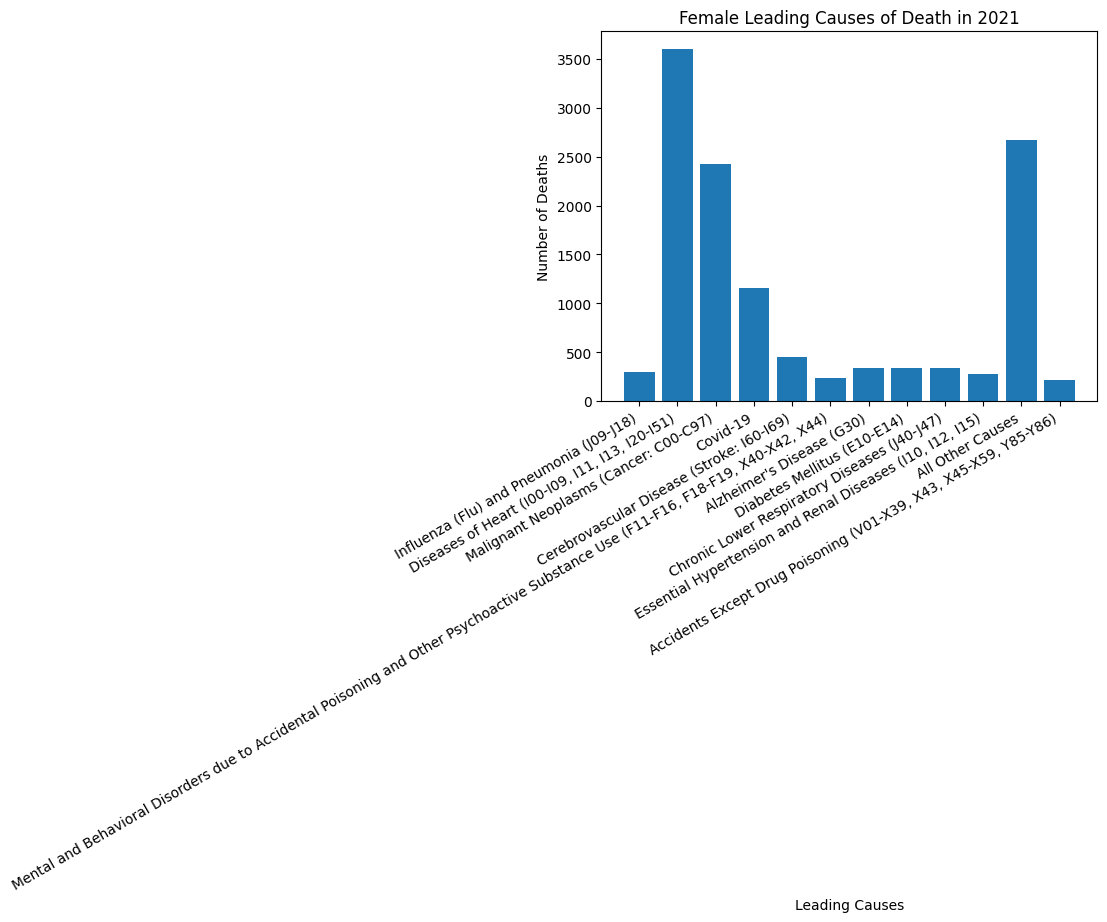

In [40]:
import matplotlib.pyplot as plt

#use matplotlib to create a histogram for all the leading causes in 2021
plt.bar(female_2021["leading_cause"], female_2021["deaths"])

#rotate x ticks
plt.xticks(rotation=30, ha='right')

#change labels
plt.xlabel("Leading Causes")
plt.ylabel("Number of Deaths")

#change title
plt.title("Female Leading Causes of Death in 2021")
plt.show()

[Text(0.5, 0, 'Leading Causes'),
 Text(0, 0.5, 'Number of Deaths'),
 Text(0.5, 1.0, 'Female Leading Causes of Death in 2021')]

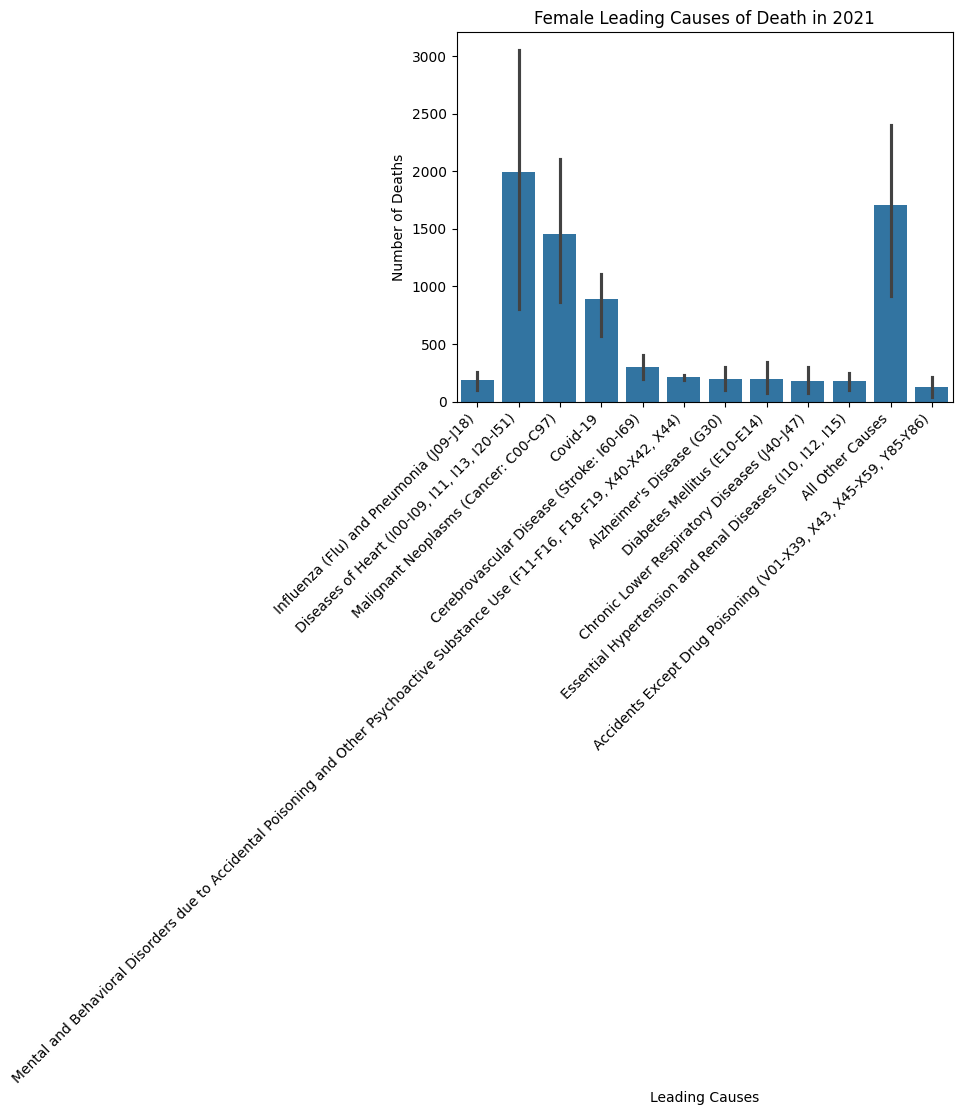

In [20]:
import seaborn as sns

#use seaborn to create a histogram for all the leading causes in 2021
ax = sns.barplot(x = "leading_cause", y = "deaths", data = female_2021)

#set ticks for x-axis
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

#rotate x ticks
ax.set_xticklabels(labels = ["Influenza (Flu) and Pneumonia (J09-J18)", "Diseases of Heart (I00-I09, I11, I13, I20-I51)", "Malignant Neoplasms (Cancer: C00-C97)", "Covid-19", "Cerebrovascular Disease (Stroke: I60-I69)", "Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)", "Alzheimer's Disease (G30)", "Diabetes Mellitus (E10-E14)", "Chronic Lower Respiratory Diseases (J40-J47)", "Essential Hypertension and Renal Diseases (I10, I12, I15)", "All Other Causes", "Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)"] ,rotation=45, horizontalalignment='right')

#change labels
ax.set(xlabel="Leading Causes", ylabel="Number of Deaths", title="Female Leading Causes of Death in 2021")

The plot above shows the leading causes of death among females in 2021. This information will help me compare with the leading causes for males in the analysis.

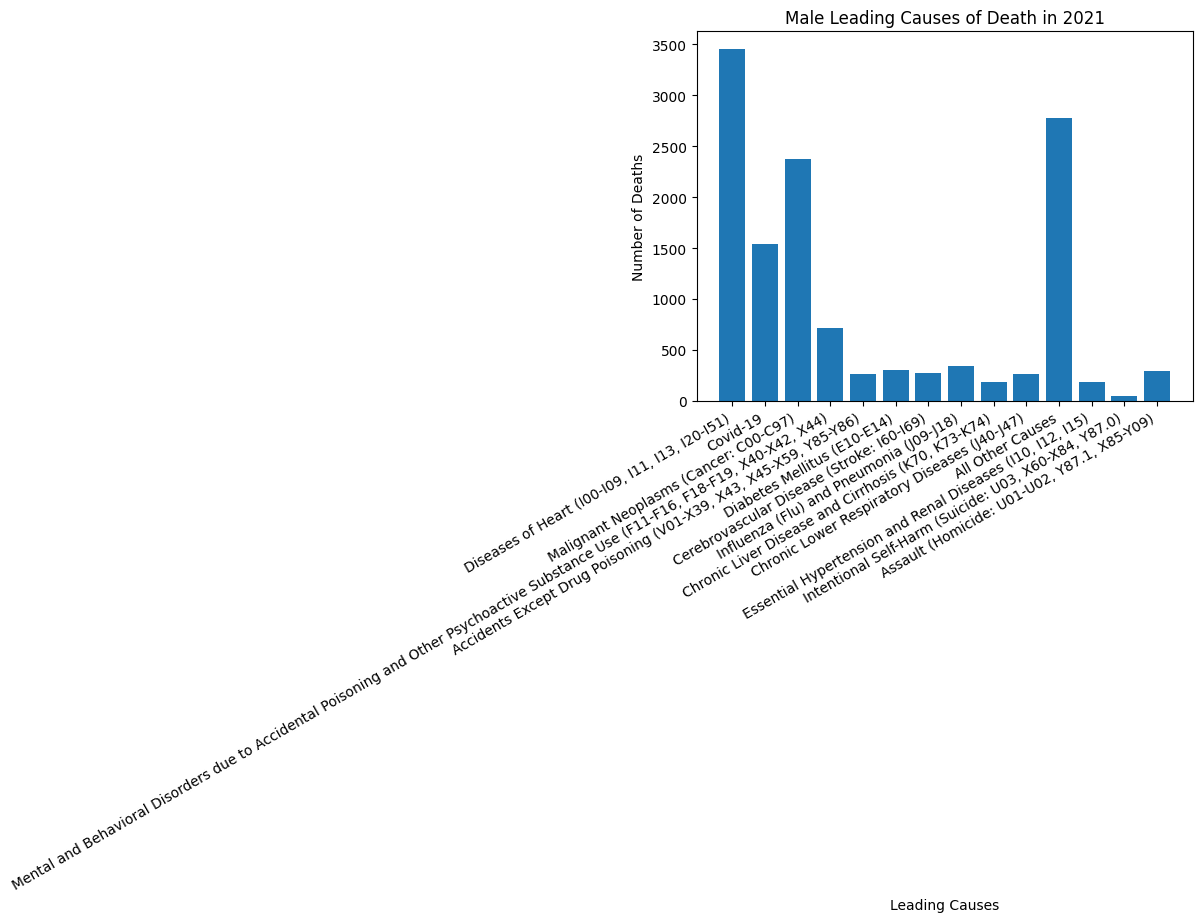

In [21]:
import matplotlib.pyplot as plt

#using matplotlib to create a histogram for all the leading causes in 2021
plt.bar(male_2021["leading_cause"], male_2021["deaths"])

#rotate x ticks
plt.xticks(rotation=30, ha='right')

#change labels
plt.xlabel("Leading Causes")
plt.ylabel("Number of Deaths")

#change title
plt.title("Male Leading Causes of Death in 2021")
plt.show()

[Text(0.5, 0, 'Leading Causes'),
 Text(0, 0.5, 'Number of Deaths'),
 Text(0.5, 1.0, 'Male Leading Causes of Death in 2021')]

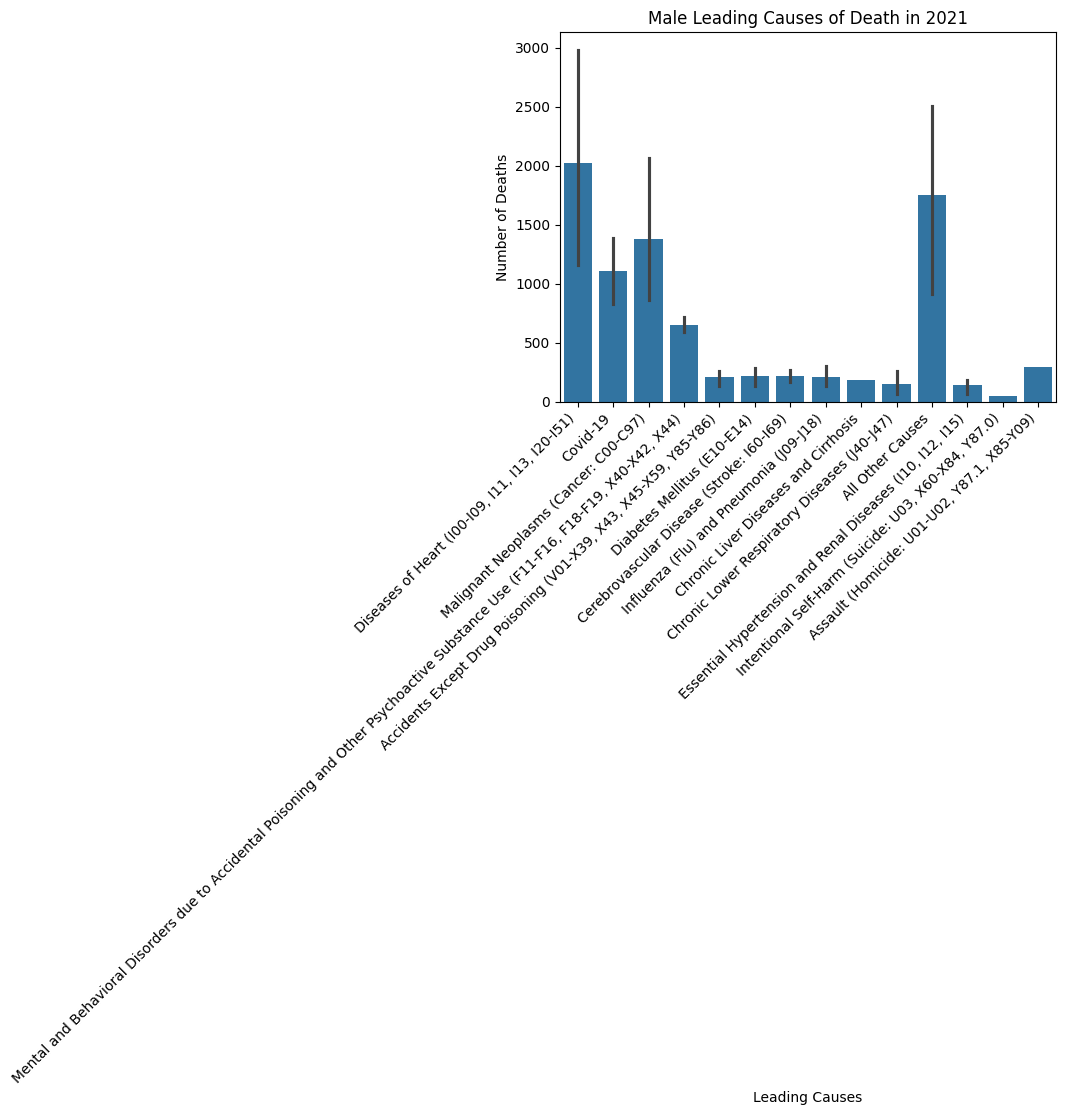

In [22]:
import seaborn as sns

#using seaborn to create a histogram for all the leading causes in 2021
ax = sns.barplot(x = "leading_cause", y = "deaths", data = male_2021)

#setting ticks for x-axis
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

#rotate x ticks
ax.set_xticklabels(labels = ["Diseases of Heart (I00-I09, I11, I13, I20-I51)", "Covid-19", "Malignant Neoplasms (Cancer: C00-C97)", "Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)", "Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)", "Diabetes Mellitus (E10-E14)", "Cerebrovascular Disease (Stroke: I60-I69)", "Influenza (Flu) and Pneumonia (J09-J18)", "Chronic Liver Diseases and Cirrhosis", "Chronic Lower Respiratory Diseases (J40-J47)", "All Other Causes", "Essential Hypertension and Renal Diseases (I10, I12, I15)", "Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)", "Assault (Homicide: U01-U02, Y87.1, X85-Y09)"] ,rotation=45, horizontalalignment='right')

#change labels
ax.set(xlabel="Leading Causes", ylabel="Number of Deaths", title="Male Leading Causes of Death in 2021")

The plot above shows the leading causes of death among males in 2021. I chose not to use a side-by-side bar plot because the categories do not match for both datasets, making it inappropriate to compare them in that format.

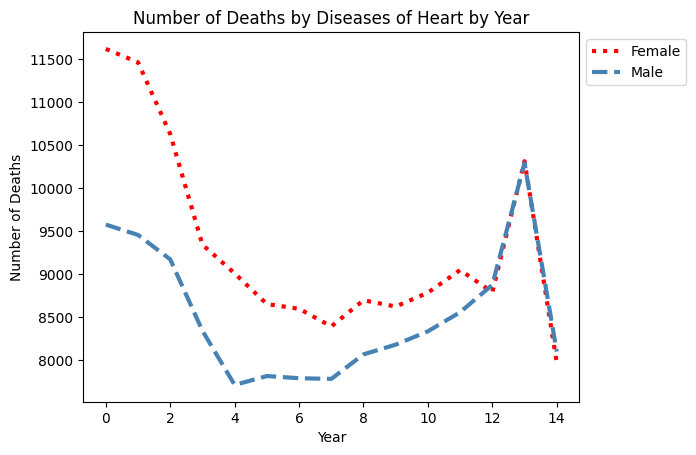

In [52]:
import matplotlib.pyplot as plt

#use matplotlib to create a line chart for number of deaths by diseases of heart by year
plt.plot(final_gender["Female"], color = "red", linewidth = 3, linestyle = "dotted")
plt.plot(final_gender["Male"], color = "steelblue", linewidth = 3, linestyle = "dashed")

#set the x-axis label
plt.xlabel("Year")

#set the y-axis label
plt.ylabel("Number of Deaths")

#set the title of the plot
plt.title("Number of Deaths by Diseases of Heart by Year")

#add a legend with bbox_to_anchor
plt.legend(["Female", "Male"], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

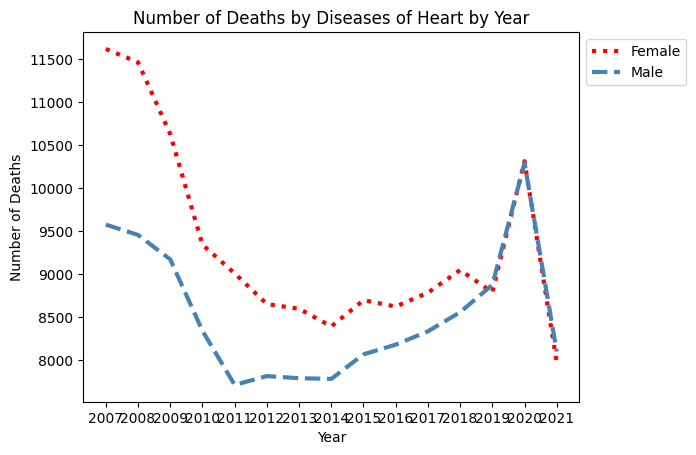

In [54]:
import seaborn as sns

#use seaborn to create a line chart for number of deaths by diseases of heart by year
ln = sns.lineplot(data=final_gender, x="year", y="Female", color="red", linewidth=3, linestyle = "dotted", label="Female")
ln = sns.lineplot(data=final_gender, x="year", y="Male", color="steelblue", linewidth=3, linestyle = "dashed", label="Male")

#change labels
ln.set(xlabel="Year", ylabel="Number of Deaths", title="Number of Deaths by Diseases of Heart by Year")

#add a legend with bbox_to_anchor
sns.move_legend(ln, "upper left", bbox_to_anchor=(1, 1))

plt.show()

The plot above illustrates that the leading cause of death for both genders, heart disease. I want to analyze the trend of heart disease as a cause of death from 2007 to 2021. To do this, I created a multiple line chart to compare and contrast the data for both genders. I observed that the trends for males and females are similar; both show an increase or decrease in deaths at the same time.

### **Part 3:**
**In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.**

### 1. Base Library vs. High-Level Interface
- **Matplotlib**: Core plotting library offering flexibility; requires more code for basic plots.
- **Seaborn**: Built on Matplotlib, simplifies complex visualizations with a higher-level interface.

### 2. Syntax and Ease of Use
- **Matplotlib**: More verbose; requires explicit setup for titles, labels, etc.
  ```python
  plt.plot(x, y)
  ```
- **Seaborn**: More concise, handles defaults automatically.
  ```python
  sns.lineplot(x=x, y=y)
  ```

### 3. Themes and Aesthetics
- **Matplotlib**: Standard look; customization needed for better visuals.
- **Seaborn**: Comes with attractive themes and color palettes built-in.

### 4. Handling Dataframes
- **Matplotlib**: Works primarily with arrays; may require data extraction.
- **Seaborn**: Integrates smoothly with pandas DataFrames, making it more convenient for analysis.

### 5. Customization and Complexity
- **Matplotlib**: Highly customizable for detailed plots, which can lead to complex code.
- **Seaborn**: Easier for quick visuals, but may have limits on intricate customizations.

Based on my experience, Seaborn is generally more user-friendly for generating plots compared to Matplotlib. However, I have encountered challenges when attempting to modify x-ticks or labels; this process proved to be significantly more complex than in Matplotlib, and I struggled to identify solutions that did not require the use of Matplotlib. I have concluded that employing both Matplotlib and Seaborn for a singular plot enhances efficiency and provides access to a wider array of stylistic options.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

From this dataset, I observed significant differences between the leading causes of death for males and females. For instance, in 2021, I found that the leading causes of death for males included assault, intentional self-harm, and chronic liver disease. Additionally, COVID-19 emerged as a new leading cause of death starting in 2020, highlighting the pandemic's severe impact on health and mortality.

Despite these differences, both genders share one common leading cause of death: heart disease. In 2007, there was a marked disparity between male and female death rates, with males experiencing a significantly higher number of deaths. However, the trends for both genders have been converging over the years, with their death rates approaching similar numbers.